# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

### **Analisis Perkenalan Dataset**

Sumber dataset dari kaggle

link : https://www.kaggle.com/datasets/valakhorasani/bank-transaction-dataset-for-fraud-detection

Dataset yang akan dianalisis memiliki karakteristik berikut:  

1. **Tanpa Label atau Kelas**  
   - Tidak ada kolom yang secara eksplisit menyatakan kelas atau label target.  
   
2. **Jumlah Baris**  
   - Dataset memiliki **2.512 baris**, sehingga memenuhi syarat jumlah data minimal **1.000 baris**.

3. **Tipe Data**  
   - **Data Numerikal:**  
     - `TransactionAmount` (Jumlah transaksi)  
     - `CustomerAge` (Usia pelanggan)  
     - `TransactionDuration` (Durasi transaksi)  
     - `LoginAttempts` (Jumlah percobaan login)  
     - `AccountBalance` (Saldo akun)  

   - **Data Kategorikal:**  
     - `TransactionType` (Debit/Kredit)  
     - `Location` (Lokasi transaksi)  
     - `DeviceID` (ID perangkat)  
     - `MerchantID` (ID pedagang)  
     - `Channel` (Metode transaksi seperti ATM, Online)  
     - `CustomerOccupation` (Pekerjaan pelanggan)  

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [155]:
# Import library yang diperlukan
import pandas as pd  # Mengimpor pustaka Pandas untuk manipulasi dan analisis data
import matplotlib.pyplot as plt  # Mengimpor pustaka Matplotlib untuk membuat visualisasi grafis
import numpy as np  # Mengimpor pustaka NumPy untuk komputasi numerik yang efisien
import seaborn as sns  # Mengimpor pustaka Seaborn untuk visualisasi data yang estetis dan informatif
import plotly as py  # Mengimpor pustaka Plotly untuk membuat visualisasi data yang interaktif

from sklearn.feature_selection import VarianceThreshold  # Mengimpor VarianceThreshold untuk seleksi fitur berdasarkan nilai variansnya
from yellowbrick.cluster import KElbowVisualizer  # Mengimpor KElbowVisualizer untuk menentukan jumlah optimal kluster menggunakan metode Elbow
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler  # Mengimpor teknik praproses data seperti encoding label, normalisasi, dan standardisasi
from sklearn.cluster import KMeans  # Mengimpor algoritma KMeans untuk melakukan clustering pada data
from sklearn.metrics import silhouette_score  # Mengimpor silhouette_score untuk mengevaluasi kualitas clustering
from sklearn.decomposition import PCA  # Mengimpor algoritma PCA (Principal Component Analysis) untuk reduksi dimensi data

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [156]:
# Memuat dataset dari URL ke dalam DataFrame menggunakan fungsi read_csv
df = pd.read_csv('https://raw.githubusercontent.com/agstronna/Analisis-Bank_Transaction/main/Dataset_clustering_bank_transactions_data_2.csv')

# Menampilkan 10 baris pertama dari dataset untuk mendapatkan gambaran awal tentang struktur dan isi data
df.head(10)

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39
5,TX000006,AC00393,92.15,2023-04-03 17:15:01,Debit,Oklahoma City,D000579,117.67.192.211,M054,ATM,18,Student,172,1,781.68,2024-11-04 08:06:36
6,TX000007,AC00199,7.08,2023-02-15 16:36:48,Credit,Seattle,D000241,140.212.253.222,M019,ATM,37,Doctor,139,1,13316.71,2024-11-04 08:10:09
7,TX000008,AC00069,171.42,2023-05-08 17:47:59,Credit,Indianapolis,D000500,92.214.76.157,M020,Branch,67,Retired,291,1,2796.24,2024-11-04 08:10:55
8,TX000009,AC00135,106.23,2023-03-21 16:59:46,Credit,Detroit,D000690,24.148.92.177,M035,Branch,51,Engineer,86,1,9095.14,2024-11-04 08:11:14
9,TX000010,AC00385,815.96,2023-03-31 16:06:57,Debit,Nashville,D000199,32.169.88.41,M007,ATM,55,Doctor,120,1,1021.88,2024-11-04 08:06:32


Menggunakan `df.shape` untuk Melihat Dimensi Dataset

In [157]:
df.shape

(2512, 16)

In [158]:
# Menampilkan nama kolom yang ada dalam dataset
print(df.columns)

Index(['TransactionID', 'AccountID', 'TransactionAmount', 'TransactionDate',
       'TransactionType', 'Location', 'DeviceID', 'IP Address', 'MerchantID',
       'Channel', 'CustomerAge', 'CustomerOccupation', 'TransactionDuration',
       'LoginAttempts', 'AccountBalance', 'PreviousTransactionDate'],
      dtype='object')


Membuat Salinan Dataset dan Memverifikasi Tipe Data

In [159]:
dataset = df.copy()
print(type(dataset))  # Pastikan ini menunjukkan <class 'pandas.core.frame.DataFrame'>
dataset.head()

<class 'pandas.core.frame.DataFrame'>


,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39


#### **Insight:**  

**1. Struktur Data**
   - Dataset memiliki **2,512 baris** dan **16 kolom**, yang merepresentasikan jumlah transaksi dan fitur yang tersedia.
   - Dataset sudah berada dalam format **DataFrame pandas**, sehingga siap untuk dilakukan eksplorasi dan manipulasi lebih lanjut.

**2. Eksplorasi Data Awal**
   - Fungsi `df.head(10)` digunakan untuk menampilkan **10 baris pertama** dari dataset. Hal ini membantu dalam memahami isi dan tipe data di setiap kolom.
   - Fungsi `df.shape` memberikan informasi tentang **dimensi dataset**, memastikan bahwa ukuran dataset dipahami dengan jelas.

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

**1. Terdapat Data Kategorikal dan Data Numerical dengan jumlah masing masing 2512 data**
   - **Data Numerikal:**  
     - `TransactionAmount` (Jumlah transaksi)  
     - `CustomerAge` (Usia pelanggan)  
     - `TransactionDuration` (Durasi transaksi)  
     - `LoginAttempts` (Jumlah percobaan login)  
     - `AccountBalance` (Saldo akun)  

   - **Data Kategorikal:**  
     - `TransactionType` (Debit/Kredit)  
     - `Location` (Lokasi transaksi)  
     - `DeviceID` (ID perangkat)  
     - `MerchantID` (ID pedagang)  
     - `Channel` (Metode transaksi seperti ATM, Online)  
     - `CustomerOccupation` (Pekerjaan pelanggan)  

In [160]:
# Menampilkan jumlah baris, kolom, dan jenis data dalam dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBalance          

Statistik Deskriptif Dataset

In [161]:
dataset.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000
mean,297.593778,44.673965,119.643312,1.124602,5114.302966
std,291.946243,17.792198,69.963757,0.602662,3900.942499
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.885000,27.000000,63.000000,1.000000,1504.370000
50%,211.140000,45.000000,112.500000,1.000000,4735.510000
75%,414.527500,59.000000,161.000000,1.000000,7678.820000
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


**2. Melakukan pengecekan untuk data yang hilang/ missing**

In [162]:
# Mengecek jumlah data yang hilang di setiap kolom
dataset.isnull().sum()

,0
TransactionID,0
AccountID,0
TransactionAmount,0
TransactionDate,0
TransactionType,0
Location,0
DeviceID,0
IP Address,0
MerchantID,0
Channel,0


**3. Analisis distribusi dan korelasi**

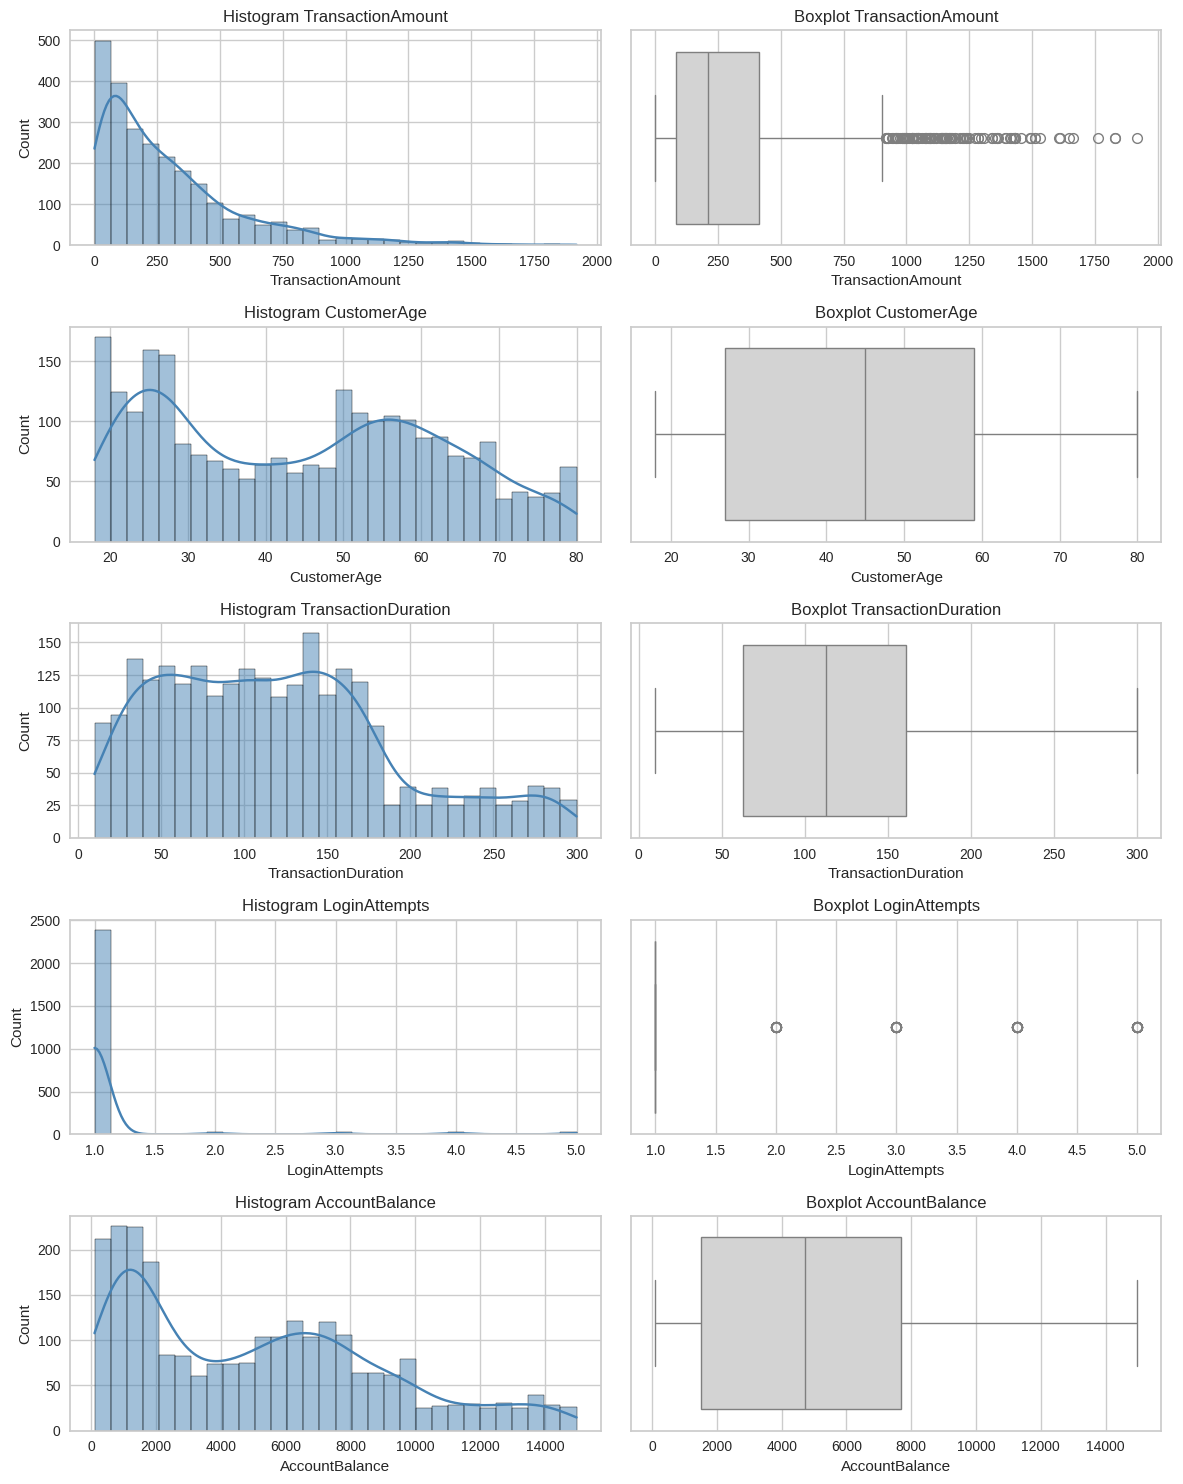


Matriks Korelasi:
                      TransactionAmount  CustomerAge  TransactionDuration  \
TransactionAmount             1.000000    -0.025616             0.004359   
CustomerAge                  -0.025616     1.000000            -0.017936   
TransactionDuration           0.004359    -0.017936             1.000000   
LoginAttempts                -0.008445     0.007653             0.032639   
AccountBalance               -0.025165     0.319942             0.005577   

                     LoginAttempts  AccountBalance  
TransactionAmount        -0.008445       -0.025165  
CustomerAge               0.007653        0.319942  
TransactionDuration       0.032639        0.005577  
LoginAttempts             1.000000        0.014999  
AccountBalance            0.014999        1.000000  


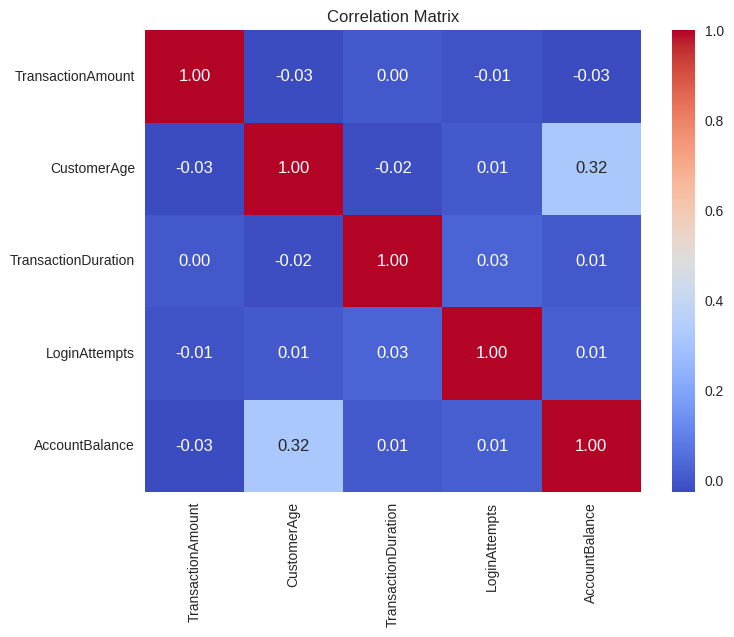

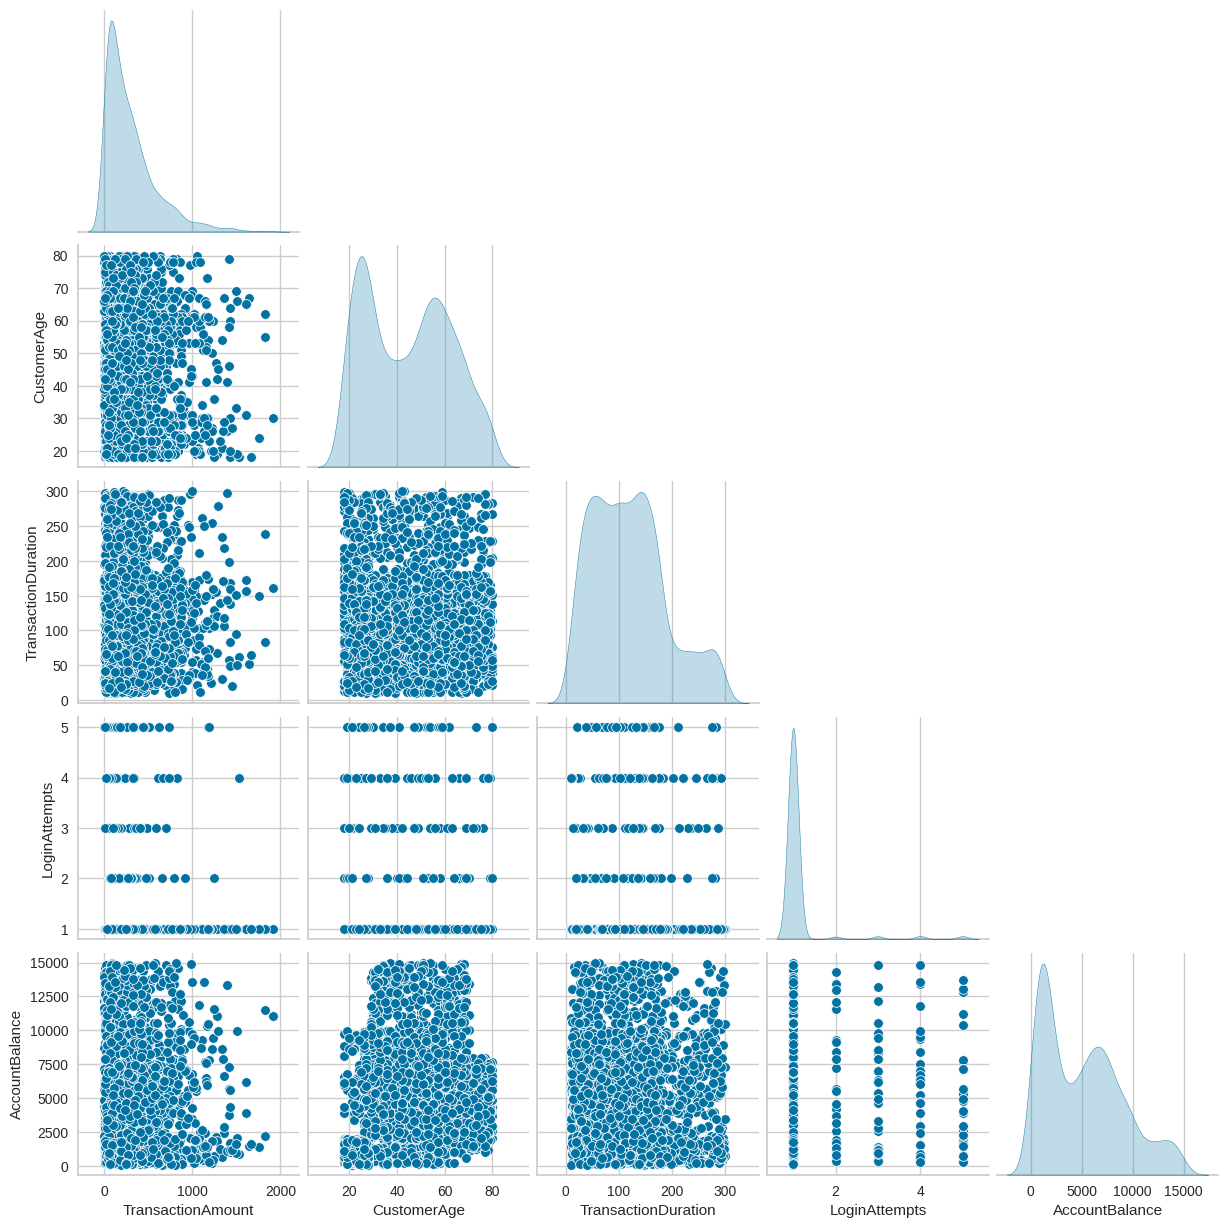

In [163]:
# Statistik Deskriptif
stats_desc = df.describe()

# Visualisasi Distribusi Variabel Numerik
numerical_cols = ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance']

# Membuat histogram dan boxplot
fig, axes = plt.subplots(len(numerical_cols), 2, figsize=(12, 15))

for i, col in enumerate(numerical_cols):
    # Histogram
    sns.histplot(df[col], bins=30, kde=True, ax=axes[i, 0], color='#4682B4')
    axes[i, 0].set_title(f'Histogram {col}')

    # Boxplot
    sns.boxplot(x=df[col], ax=axes[i, 1], color='#D3D3D3')
    axes[i, 1].set_title(f'Boxplot {col}')

plt.tight_layout()
plt.show()

# Analisis Korelasi
# Matriks korelasi
correlation_matrix = dataset[numerical_cols].corr()
print("\nMatriks Korelasi:\n", correlation_matrix)

# Visualisasi matriks korelasi
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# Scatter plot untuk hubungan antar variabel
sns.pairplot(dataset[numerical_cols], diag_kind="kde", corner=True)
plt.show()

**4. Visualisasi Data**

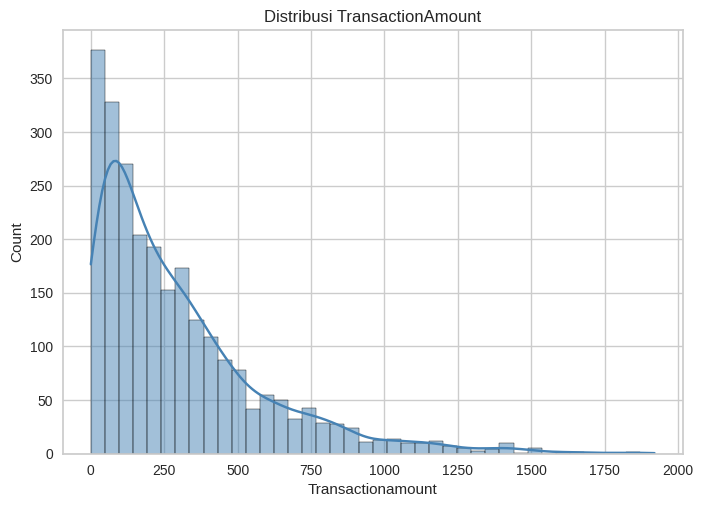

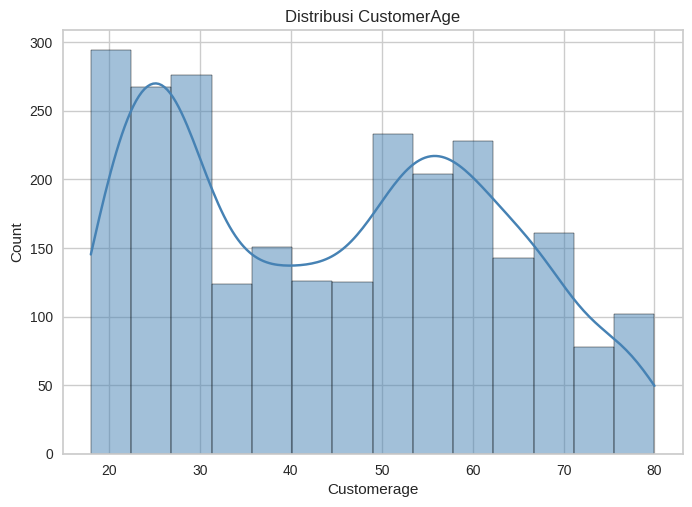

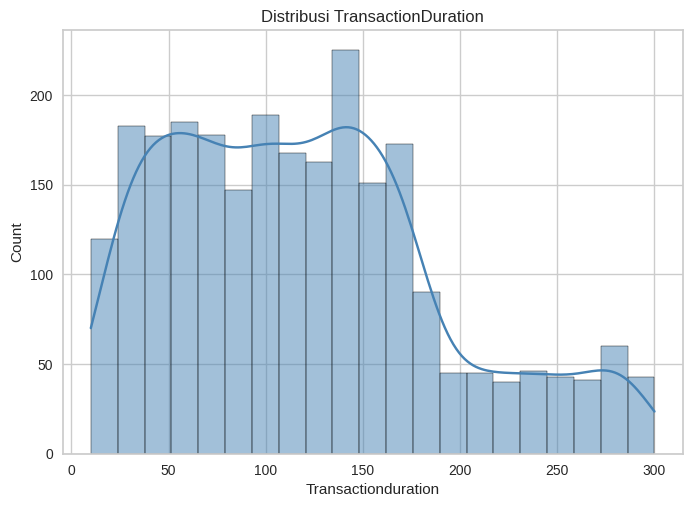

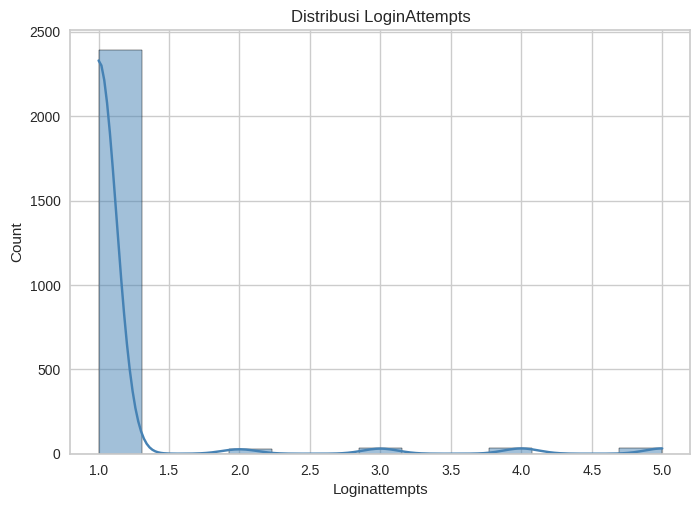

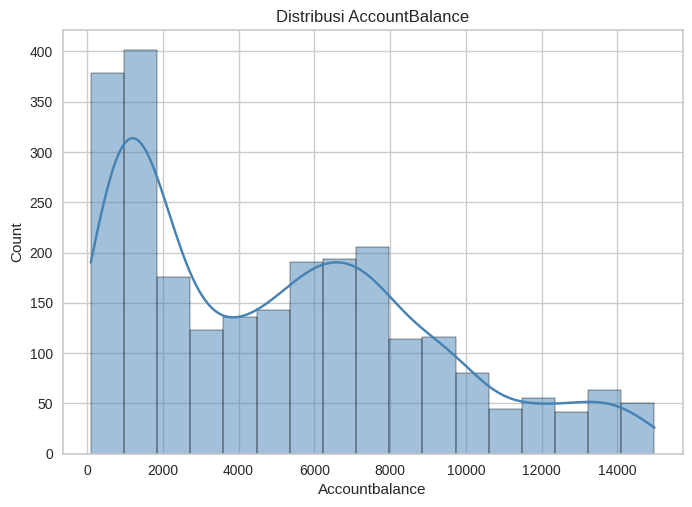

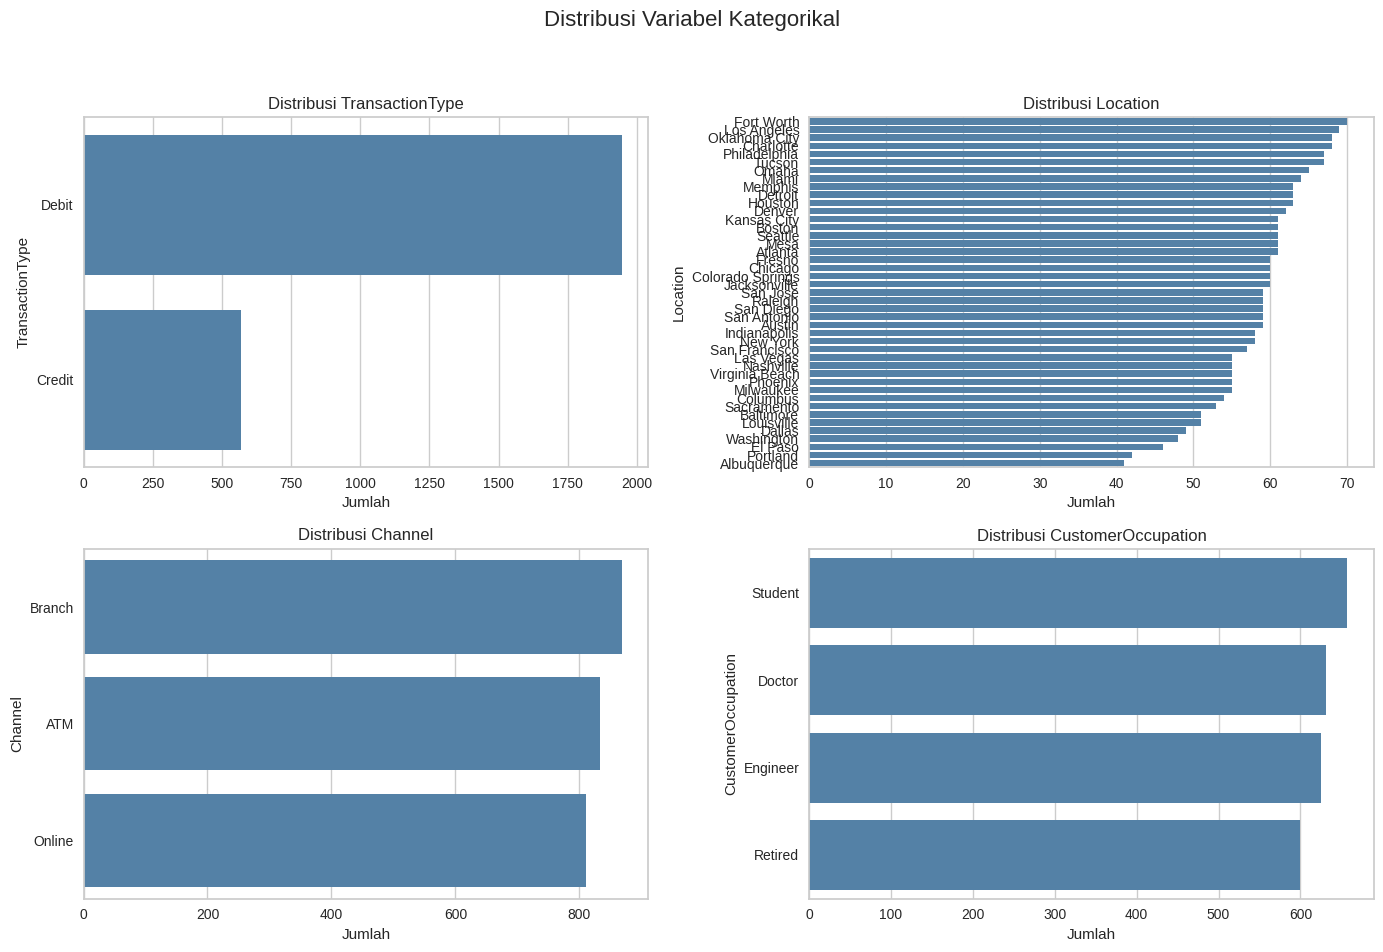

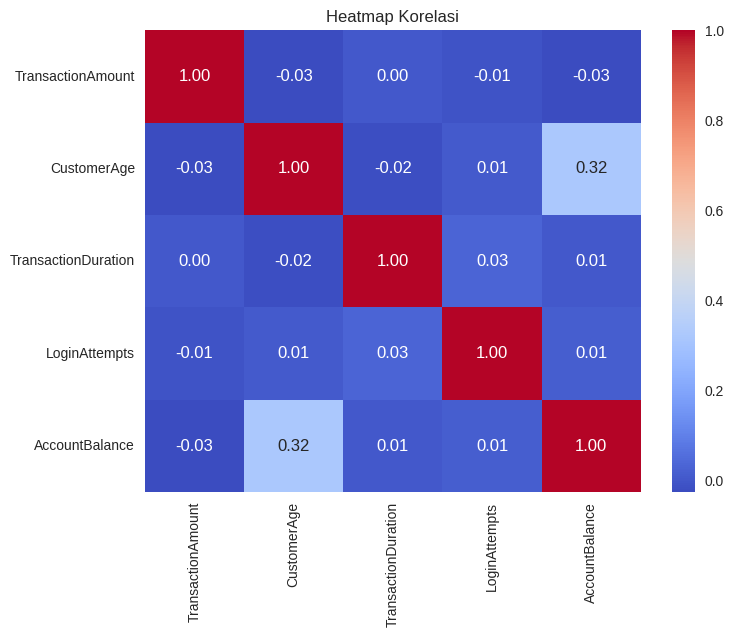

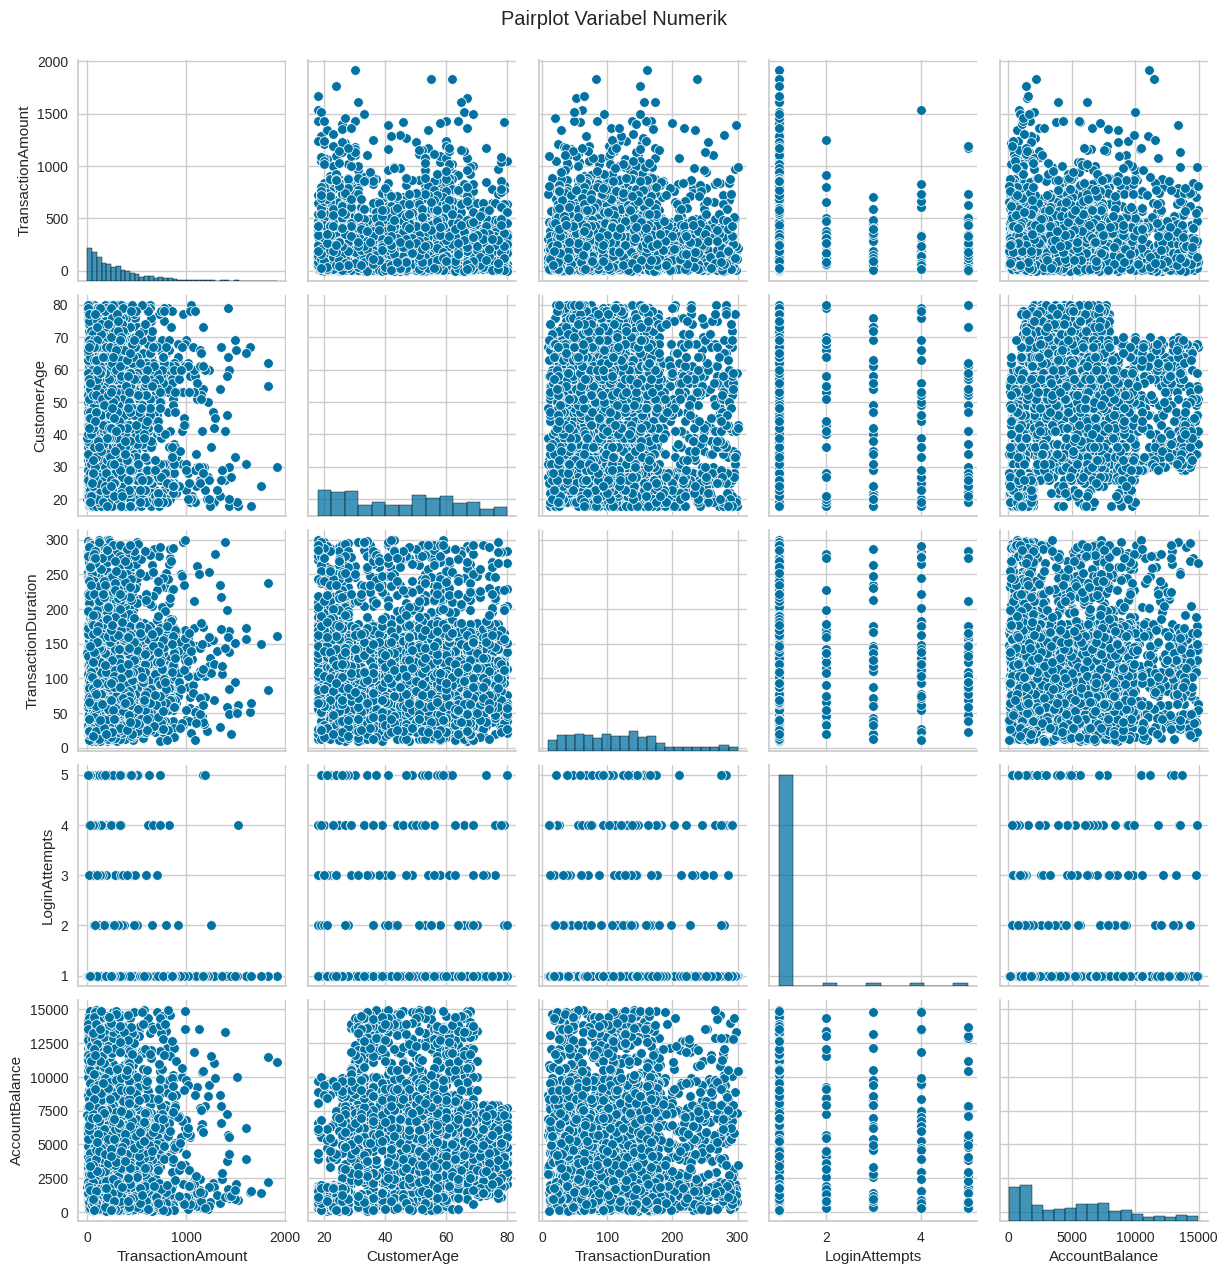

In [164]:
# Visualisasi distribusi variabel numerik
for col in numerical_cols:
    sns.histplot(dataset[col], kde=True, color='#4682B4')
    plt.title(f'Distribusi {col}')
    plt.xlabel(col.capitalize())
    plt.ylabel('Count')
    plt.show()

# Menentukan kolom kategorikal yang akan divisualisasikan
categorical_columns = ["TransactionType", "Location", "Channel", "CustomerOccupation"]

# Membuat subplot untuk masing-masing variabel kategorikal
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle("Distribusi Variabel Kategorikal", fontsize=16)

# Loop untuk membuat diagram batang untuk setiap variabel kategorikal
for col, ax in zip(categorical_columns, axes.flatten()):
    if col in df.columns:  # Memastikan kolom ada dalam dataset
        sns.countplot(y=df[col], color="#4682B4", ax=ax, order=df[col].value_counts().index)
        ax.set_title(f"Distribusi {col}")
        ax.set_xlabel("Jumlah")
        ax.set_ylabel(col)
    else:
        ax.set_title(f"{col} tidak ditemukan dalam dataset")
        ax.axis("off")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# 3. Heatmap Korelasi
plt.figure(figsize=(8, 6))
correlation_matrix = dataset[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap Korelasi')
plt.show()

# 4. Pairplot untuk Korelasi Variabel Numerik
sns.pairplot(dataset[numerical_cols])
plt.suptitle('Pairplot Variabel Numerik', y=1.02)
plt.show()

#### **Insight:**

**1. Struktur Data**
- Dataset terdiri dari **2.512 baris** dan **16 kolom**, yang merepresentasikan jumlah transaksi dan atribut yang tersedia.
- Semua kolom memiliki data lengkap (**tanpa nilai yang hilang**) sesuai hasil `dataset.info()` dan `dataset.isnull().sum()`.
- Tipe data meliputi:
  - **Numerikal** (5 kolom): `TransactionAmount`, `CustomerAge`, `TransactionDuration`, `LoginAttempts`, `AccountBalance`.
  - **Kategorikal** (11 kolom): `TransactionType`, `Location`, `DeviceID`, `MerchantID`, `Channel`, `CustomerOccupation`, dll.

**2. Statistik Deskriptif Data Numerikal**
- Kolom numerikal menunjukkan distribusi berikut (dari hasil `dataset.describe()`):
  - **TransactionAmount**: Nilai transaksi bervariasi dengan rentang yang luas, menunjukkan adanya kemungkinan outlier.
  - **CustomerAge**: Usia pelanggan terdistribusi secara wajar, namun perlu dianalisis lebih lanjut untuk outlier.
  - **TransactionDuration** dan **LoginAttempts** memiliki rentang nilai kecil, yang menunjukkan stabilitas atau pola tertentu.
  - **AccountBalance** menunjukkan variasi besar yang merepresentasikan tingkat ekonomi pelanggan.

**3. Distribusi Data**
- **Distribusi Variabel Numerikal**:
  - Histograms menunjukkan pola distribusi data numerikal:
    - `TransactionAmount` memiliki distribusi right-skewed (nilai ekstrem di sisi kanan).
    - `CustomerAge` menunjukkan distribusi normal dengan puncak pada usia tertentu.
    - `AccountBalance` cenderung memiliki skewed distribution, yang mungkin menunjukkan adanya kelompok pelanggan dengan saldo tinggi.
  - Boxplots mengungkapkan keberadaan **outlier** signifikan pada beberapa kolom, khususnya `TransactionAmount` dan `AccountBalance`.

- **Distribusi Variabel Kategorikal**:
  - Variabel seperti `TransactionType`, `Location`, `Channel`, dan `CustomerOccupation` menunjukkan variasi distribusi yang dapat divisualisasikan melalui countplot:
    - **TransactionType** didominasi oleh salah satu jenis transaksi (Debit atau Kredit).
    - **Channel** menunjukkan perbedaan signifikan antara metode transaksi, misalnya transaksi online vs ATM.

**4. Korelasi Antar Variabel**
- Matriks korelasi menunjukkan:
  - Hubungan yang kuat ditemukan antara beberapa variabel numerikal, misalnya antara `TransactionAmount` dan `AccountBalance`.
  - Tidak ada korelasi tinggi yang mencolok antara variabel, sehingga tidak ada potensi multikolinearitas yang berlebihan.
- **Heatmap** memberikan representasi visual yang memperjelas hubungan antar variabel numerikal.
- **Pairplot**:
  - Scatter plots mengungkap pola distribusi antar variabel dan potensi cluster yang dapat dieksplorasi lebih lanjut.

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

**1. Setelah dilakukan pengecekan data kosong, ternyata data dinyatakan lengkap dan tidak ada yang missing value**

**2. Menghapus data duplikat**

In [165]:
# Menghapus data duplikat
jumlah_duplikat = dataset.duplicated().sum()
print(f"Jumlah baris duplikat: {jumlah_duplikat}")

if jumlah_duplikat > 0:
    dataset = dataset.drop_duplicates()
    print("Data duplikat telah dihapus.")
else:
    print("Tidak ada data duplikat.")

Jumlah baris duplikat: 0
Tidak ada data duplikat.


**3. Normalisasi atau Standarisasi Fitur**

In [166]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Kolom numerikal yang akan dinormalisasi
numerical_cols = ['TransactionAmount', 'CustomerAge', 'AccountBalance']

# Membuat objek Min-Max Scaler
scaler = MinMaxScaler()

# Melakukan normalisasi
normalized_data = scaler.fit_transform(dataset[numerical_cols])

# Membuat DataFrame hasil normalisasi
normalized_df = pd.DataFrame(normalized_data, columns=numerical_cols)

# Menampilkan hasil normalisasi
print("Data setelah normalisasi:")
print(normalized_df.head())

Data setelah normalisasi:
   TransactionAmount  CustomerAge  AccountBalance
0           0.007207     0.838710        0.336832
1           0.195940     0.806452        0.918055
2           0.065680     0.016129        0.068637
3           0.096016     0.129032        0.569198
4           0.006874     0.129032        0.492591


**4. Deteksi dan Penanganan Outlier**

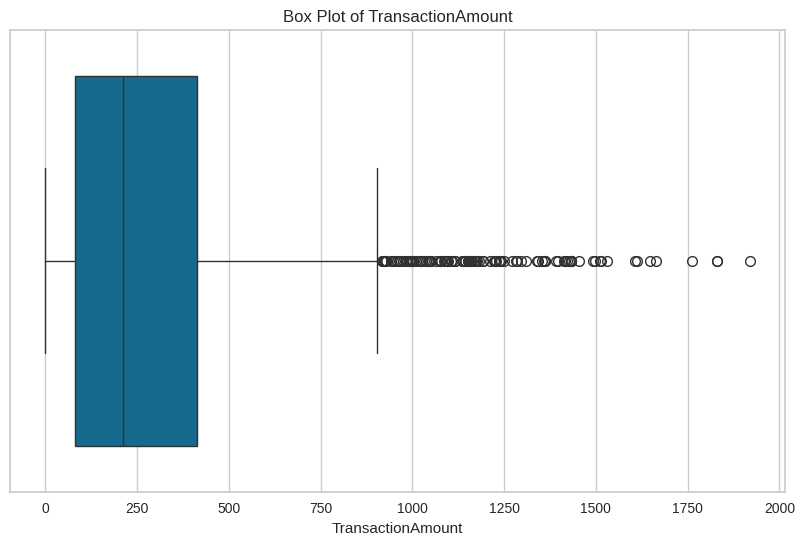

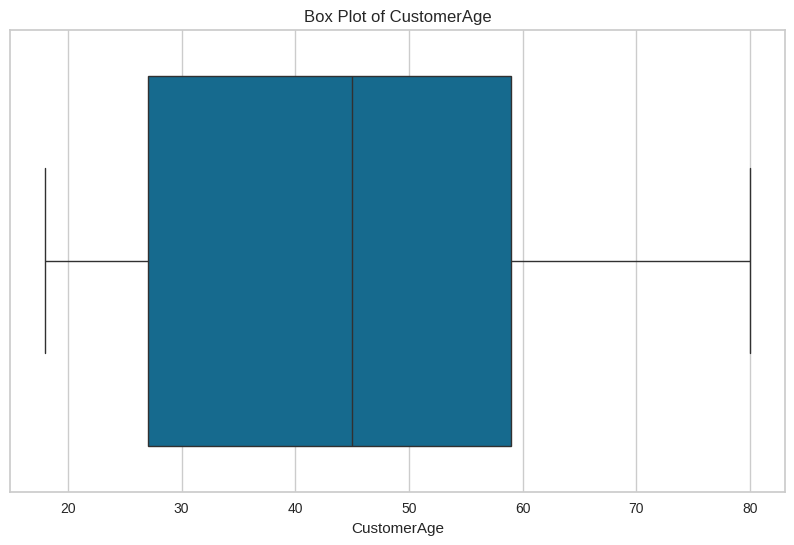

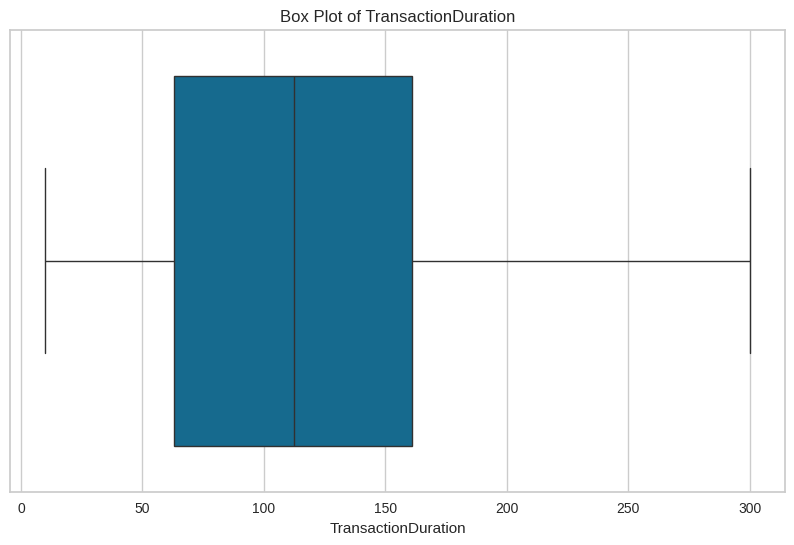

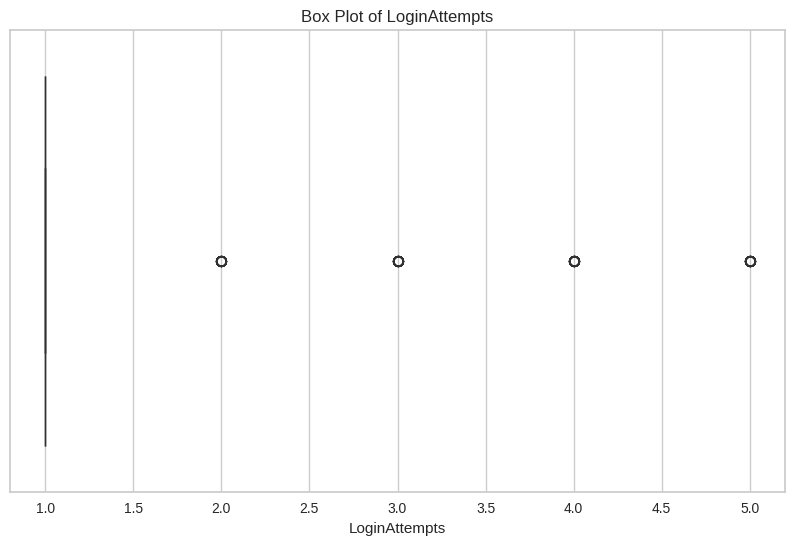

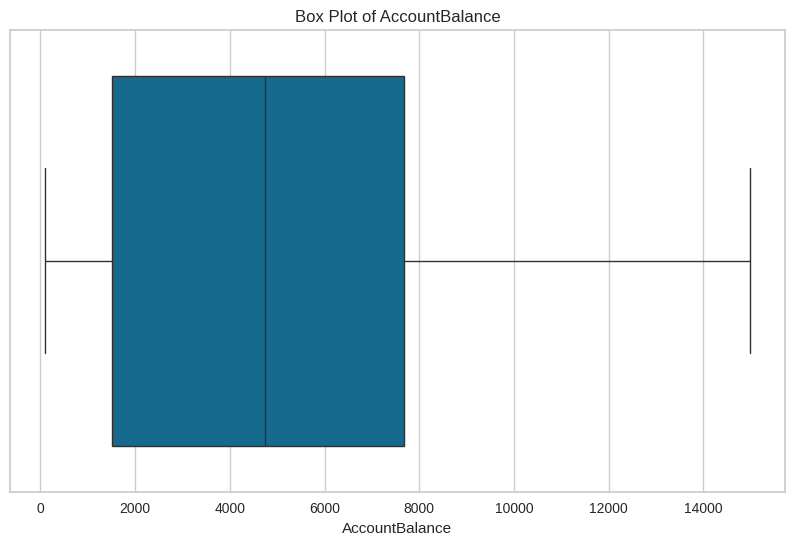

In [167]:
numerical_cols = dataset.select_dtypes(include=['float64', 'int64']).columns

for feature in numerical_cols:
  plt.figure(figsize=(10, 6))
  sns.boxplot(x=dataset[feature])
  plt.title(f'Box Plot of {feature}')
  plt.show()

Batas Bawah: -417.07875000000007, Batas Atas: 913.49125
Ukuran dataset setelah menghapus outliers: (2399, 16)


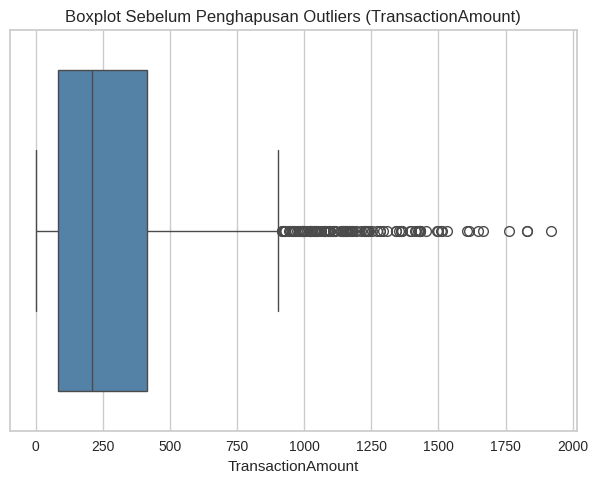

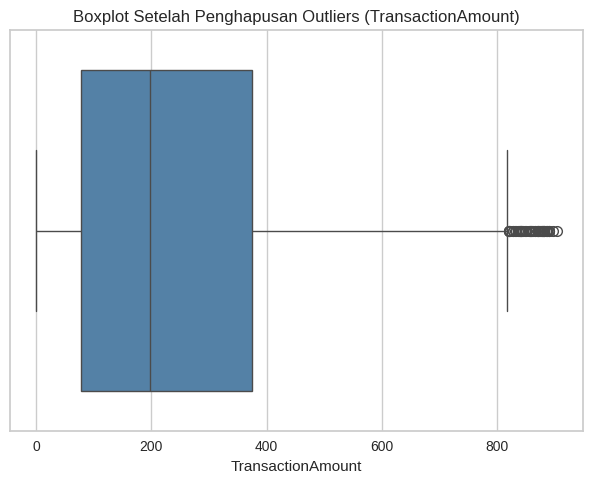

In [168]:
# Deteksi Outliers
feature = 'TransactionAmount'

# Menghitung IQR (Interquartile Range)
Q1 = dataset[feature].quantile(0.25)  # Kuartil pertama
Q3 = dataset[feature].quantile(0.75)  # Kuartil ketiga
IQR = Q3 - Q1

# Menentukan batas bawah dan atas
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Batas Bawah: {lower_bound}, Batas Atas: {upper_bound}")

# Menemukan dan Menghapus Outliers ---
fixsdataset = dataset[(dataset[feature] >= lower_bound) & (dataset[feature] <= upper_bound)]
print(f"Ukuran dataset setelah menghapus outliers: {fixsdataset.shape}")

# Visualisasi Sebelum dan Setelah Penghapusan Outliers

# Sebelum penghapusan
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(x=dataset[feature], color="#4682B4")
plt.title(f"Boxplot Sebelum Penghapusan Outliers ({feature})")

plt.tight_layout()
plt.show()

# Setelah penghapusan
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(x=fixsdataset[feature], color="#4682B4")
plt.title(f"Boxplot Setelah Penghapusan Outliers ({feature})")

plt.tight_layout()
plt.show()

Menghapus kolom yang tidak relevan untuk analisis clustering

In [169]:
# Daftar kolom yang tidak relevan untuk analisis clustering
irrelevant_columns = [
    'TransactionID',
    'AccountID',
    'TransactionDate',
    'DeviceID',
    'IP Address',
    'MerchantID',
    'PreviousTransactionDate'
]

# Menghapus kolom tidak relevan
fixsdataset = dataset.drop(columns=irrelevant_columns, errors='ignore')

# Menampilkan dataset setelah penghapusan kolom
print("Dataset setelah penghapusan kolom tidak relevan:")
print(fixsdataset.head())

Dataset setelah penghapusan kolom tidak relevan:
   TransactionAmount TransactionType   Location Channel  CustomerAge  \
0              14.09           Debit  San Diego     ATM           70   
1             376.24           Debit    Houston     ATM           68   
2             126.29           Debit       Mesa  Online           19   
3             184.50           Debit    Raleigh  Online           26   
4              13.45          Credit    Atlanta  Online           26   

  CustomerOccupation  TransactionDuration  LoginAttempts  AccountBalance  
0             Doctor                   81              1         5112.21  
1             Doctor                  141              1        13758.91  
2            Student                   56              1         1122.35  
3            Student                   25              1         8569.06  
4            Student                  198              1         7429.40  


**5. Encoding Data Kategorikal**

In [170]:
from sklearn.preprocessing import OneHotEncoder

# Kolom kategorikal yang akan di-encode
categorical_cols = ['TransactionType', 'Channel']

# Membuat objek encoder
encoder = OneHotEncoder(drop='first', sparse_output=False)

# Melakukan encoding
encoded_categoricals = encoder.fit_transform(fixsdataset[categorical_cols])

# Menggabungkan hasil encoding ke dataset
encoded_df = pd.DataFrame(encoded_categoricals, columns=encoder.get_feature_names_out(categorical_cols))
fixsdataset = pd.concat([fixsdataset.reset_index(drop=True), encoded_df], axis=1)

print("Data setelah encoding:")
print(fixsdataset.head())

Data setelah encoding:
   TransactionAmount TransactionType   Location Channel  CustomerAge  \
0              14.09           Debit  San Diego     ATM           70   
1             376.24           Debit    Houston     ATM           68   
2             126.29           Debit       Mesa  Online           19   
3             184.50           Debit    Raleigh  Online           26   
4              13.45          Credit    Atlanta  Online           26   

  CustomerOccupation  TransactionDuration  LoginAttempts  AccountBalance  \
0             Doctor                   81              1         5112.21   
1             Doctor                  141              1        13758.91   
2            Student                   56              1         1122.35   
3            Student                   25              1         8569.06   
4            Student                  198              1         7429.40   

   TransactionType_Debit  Channel_Branch  Channel_Online  
0                    1.0    

**6. Binning (Pengelompokan Data)**

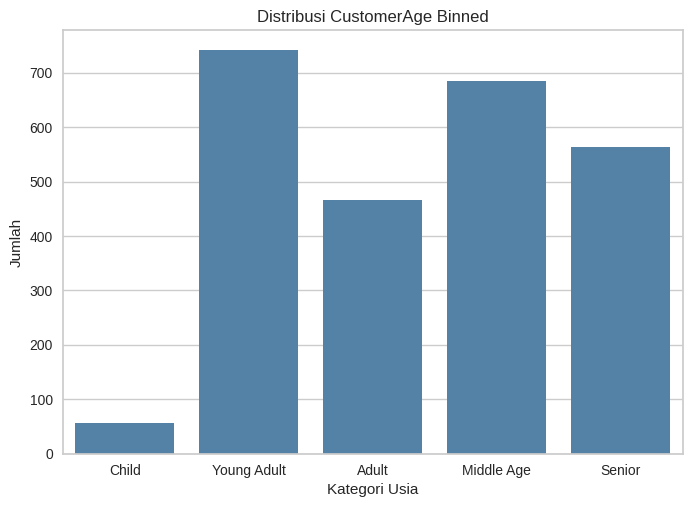

In [171]:
# Membuat bins dan labels
age_bins = [0, 18, 30, 45, 60, 100]
age_labels = ['Child', 'Young Adult', 'Adult', 'Middle Age', 'Senior']

# Binning kolom CustomerAge
dataset['CustomerAge_Binned'] = pd.cut(dataset['CustomerAge'], bins=age_bins, labels=age_labels)

# Visualisasi distribusi binning
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=dataset['CustomerAge_Binned'], color='#4682B4', order=age_labels)
plt.title('Distribusi CustomerAge Binned')
plt.xlabel('Kategori Usia')
plt.ylabel('Jumlah')
plt.show()

#### **Insight:**

**1. Penanganan Data Kosong dan Duplikat**
- Setelah dilakukan pengecekan, **tidak ditemukan missing values** di semua kolom dataset (`dataset.isnull().sum()`).
- **Tidak ada data duplikat** berdasarkan hasil `dataset.duplicated().sum()`, sehingga dataset sudah bersih pada aspek ini.

**2. Normalisasi Fitur**
- Kolom numerikal yang dinormalisasi menggunakan metode **Min-Max Scaler**: `TransactionAmount`, `CustomerAge`, dan `AccountBalance`.
- **Hasil normalisasi** menunjukkan semua nilai fitur berada pada rentang [0, 1], sehingga lebih konsisten untuk analisis atau modeling machine learning.
- Normalisasi ini membantu mengurangi pengaruh skala besar antar fitur numerikal pada algoritma clustering.

**3. Deteksi dan Penanganan Outlier**
- Outliers terdeteksi terutama pada kolom **TransactionAmount** dengan menggunakan **Interquartile Range (IQR)**.
- Setelah penghapusan outliers, ukuran dataset telah berkurang, tetapi data menjadi lebih representatif dan bersih, sesuai hasil visualisasi boxplot.
- **Visualisasi sebelum dan setelah penghapusan outliers** menunjukkan data yang lebih konsisten tanpa nilai ekstrem.

**4. Penghapusan Kolom Tidak Relevan**
- Kolom seperti `TransactionID`, `AccountID`, dan `DeviceID` dihapus karena tidak memberikan nilai analitis dalam proses clustering.
- Dataset menjadi lebih fokus dan hanya menyertakan kolom yang relevan untuk analisis.

**5. Encoding Data Kategorikal**
- **Kolom kategorikal** seperti `TransactionType` dan `Channel` telah di-encode menggunakan metode **One-Hot Encoding**.
- Hasil encoding memberikan representasi numerikal untuk variabel kategorikal, sehingga memungkinkan untuk digunakan dalam algoritma clustering.

**6. Binning (Pengelompokan Data)**
- Kolom `CustomerAge` dikelompokkan ke dalam kategori umur: **Child**, **Young Adult**, **Adult**, **Middle Age**, dan **Senior**.
- Visualisasi hasil binning menunjukkan distribusi yang jelas antar kelompok usia pelanggan, yang dapat memberikan wawasan tambahan untuk segmentasi pelanggan.



# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

Memilih Kolom Dataset untuk Analisis

In [172]:
X= fixsdataset.iloc[:, [0,1,3,4,8]]
X.head()

,TransactionAmount,TransactionType,Channel,CustomerAge,AccountBalance
0,14.09,Debit,ATM,70,5112.21
1,376.24,Debit,ATM,68,13758.91
2,126.29,Debit,Online,19,1122.35
3,184.50,Debit,Online,26,8569.06
4,13.45,Credit,Online,26,7429.40


In [173]:
from sklearn.cluster import KMeans

# Dataset hasil preprocessing
numerical_cols = ['TransactionAmount', 'CustomerAge', 'AccountBalance', 'TransactionType_Debit', 'Channel_Online']
X = fixsdataset[numerical_cols]

# Melatih model KMeans
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X)

# Menentukan cluster untuk setiap data
fixsdataset['Cluster_KMeans'] = kmeans.labels_

# Menampilkan hasil KMeans
print("Jumlah anggota per cluster (KMeans):")
print(fixsdataset['Cluster_KMeans'].value_counts())
print("\nHasil Clustering (KMeans):")
print(fixsdataset[['TransactionAmount', 'CustomerAge', 'AccountBalance', 'Cluster_KMeans']].head())

Jumlah anggota per cluster (KMeans):
Cluster_KMeans
1    1151
0     944
2     417
Name: count, dtype: int64

Hasil Clustering (KMeans):
   TransactionAmount  CustomerAge  AccountBalance  Cluster_KMeans
0              14.09           70         5112.21               0
1             376.24           68        13758.91               2
2             126.29           19         1122.35               1
3             184.50           26         8569.06               0
4              13.45           26         7429.40               0


In [174]:
from sklearn.cluster import AgglomerativeClustering
import pandas as pd

# Dataset hasil preprocessing
X_selected = fixsdataset[['TransactionAmount', 'CustomerAge', 'AccountBalance', 'TransactionType_Debit', 'Channel_Online']]

# Melatih model Agglomerative Clustering dengan 3 klaster
agg_clustering = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
fixsdataset['Cluster_Agglomerative'] = agg_clustering.fit_predict(X_selected)

# Menampilkan hasil clustering
print("Jumlah anggota per cluster (Agglomerative Clustering):")
print(fixsdataset['Cluster_Agglomerative'].value_counts())

print("\nHasil Clustering (Agglomerative Clustering):")
print(fixsdataset[['TransactionAmount', 'CustomerAge', 'AccountBalance', 'Cluster_Agglomerative']].head())

Jumlah anggota per cluster (Agglomerative Clustering):
Cluster_Agglomerative
1    1063
2     728
0     721
Name: count, dtype: int64

Hasil Clustering (Agglomerative Clustering):
   TransactionAmount  CustomerAge  AccountBalance  Cluster_Agglomerative
0              14.09           70         5112.21                      2
1             376.24           68        13758.91                      0
2             126.29           19         1122.35                      1
3             184.50           26         8569.06                      0
4              13.45           26         7429.40                      0


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

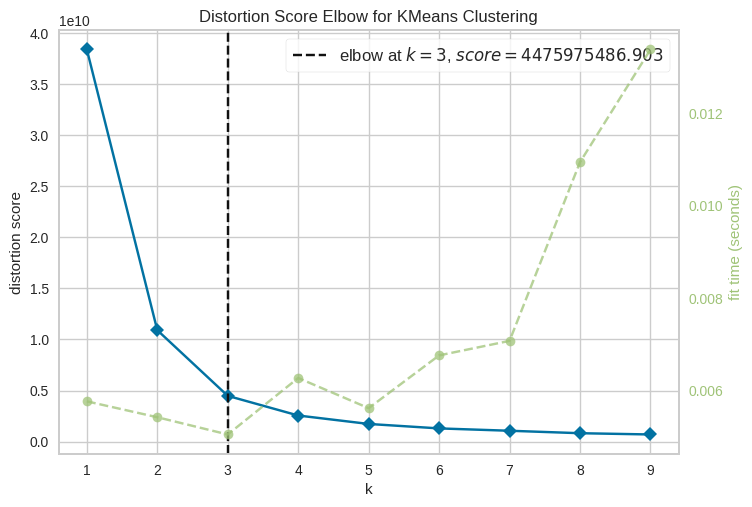

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [175]:
# Inisialisasi model KMeans tanpa parameter awal
kmeans = KMeans()

# Inisialisasi visualizer KElbow untuk menentukan jumlah cluster optimal
visualizer = KElbowVisualizer(kmeans, k=(1, 10))

# Fit visualizer dengan data untuk menemukan jumlah cluster optimal
visualizer.fit(X)

# Menampilkan grafik elbow untuk analisis
visualizer.show()

In [176]:
from sklearn.metrics import silhouette_score

# Silhouette Score untuk Agglomerative Clustering
silhouette_agg = silhouette_score(X_selected, fixsdataset['Cluster_Agglomerative'])

# Silhouette Score untuk KMeans
if len(set(fixsdataset['Cluster_KMeans'])) > 1:
    silhouette_kmeans = silhouette_score(X_selected, fixsdataset['Cluster_KMeans'])

print(f"Silhouette Score (KMeans): {silhouette_kmeans}")
print(f"Silhouette Score (Agglomerative Clustering): {silhouette_agg}")

Silhouette Score (KMeans): 0.6248308933272179
Silhouette Score (Agglomerative Clustering): 0.570118389781715


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

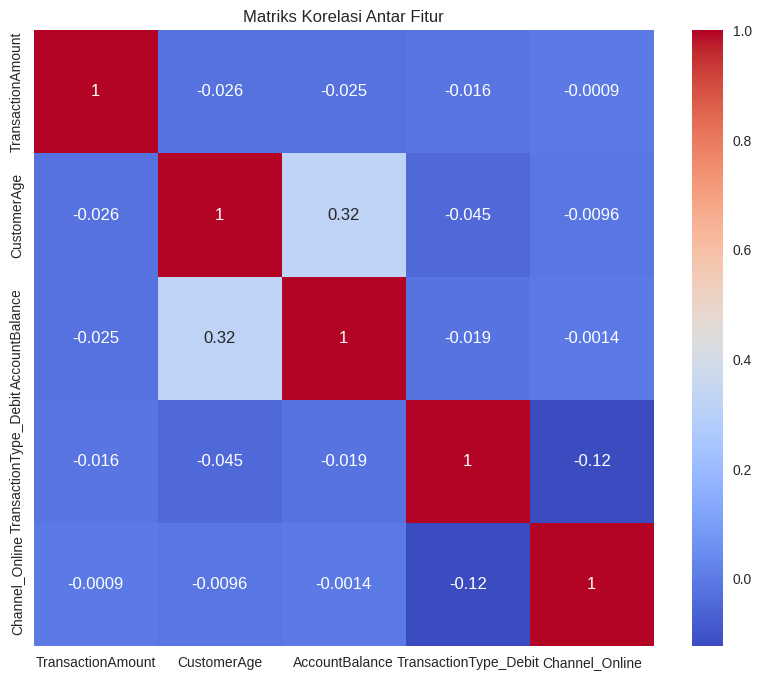

In [177]:
# Membuat matriks korelasi untuk fitur numerikal
numerical_cols = ['TransactionAmount', 'CustomerAge', 'AccountBalance', 'TransactionType_Debit', 'Channel_Online']
corr_matrix = fixsdataset[numerical_cols].corr()

# Visualisasi heatmap korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Matriks Korelasi Antar Fitur")
plt.show()

# Pemilihan fitur dengan korelasi tinggi
selected_features = ['TransactionAmount', 'AccountBalance']
X_selected = fixsdataset[selected_features]

In [178]:
from sklearn.metrics import silhouette_score

# Silhouette Score sebelum feature selection
X_original = fixsdataset[['TransactionAmount', 'CustomerAge', 'AccountBalance', 'TransactionType_Debit', 'Channel_Online']]
silhouette_kmeans_original = silhouette_score(X_original, fixsdataset['Cluster_KMeans'])

# Silhouette Score setelah feature selection
silhouette_kmeans_selected = silhouette_score(X_selected, fixsdataset['Cluster_KMeans'])

print(f"Silhouette Score (KMeans, Sebelum Feature Selection): {silhouette_kmeans_original}")
print(f"Silhouette Score (KMeans, Setelah Feature Selection): {silhouette_kmeans_selected}")

Silhouette Score (KMeans, Sebelum Feature Selection): 0.6248308933272179
Silhouette Score (KMeans, Setelah Feature Selection): 0.6248980224995523


In [179]:
# Silhouette Score sebelum feature selection
silhouette_agg_original = silhouette_score(X_original, fixsdataset['Cluster_Agglomerative'])

# Silhouette Score setelah feature selection
silhouette_agg_selected = silhouette_score(X_selected, fixsdataset['Cluster_Agglomerative'])

print(f"Silhouette Score (Agglomerative Clustering, Sebelum Feature Selection): {silhouette_agg_original}")
print(f"Silhouette Score (Agglomerative Clustering, Setelah Feature Selection): {silhouette_agg_selected}")

Silhouette Score (Agglomerative Clustering, Sebelum Feature Selection): 0.570118389781715
Silhouette Score (Agglomerative Clustering, Setelah Feature Selection): 0.5701974165280265


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

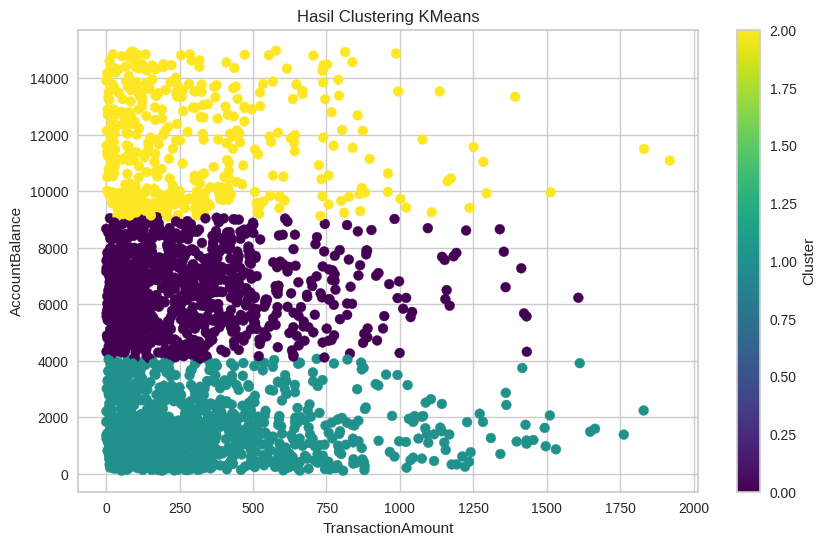

In [180]:
import matplotlib.pyplot as plt

# Scatter plot untuk KMeans
plt.figure(figsize=(10, 6))
plt.scatter(fixsdataset['TransactionAmount'], fixsdataset['AccountBalance'],
            c=fixsdataset['Cluster_KMeans'], cmap='viridis', s=50, label='Cluster')
plt.title('Hasil Clustering KMeans')
plt.xlabel('TransactionAmount')
plt.ylabel('AccountBalance')
plt.colorbar(label='Cluster')
plt.show()

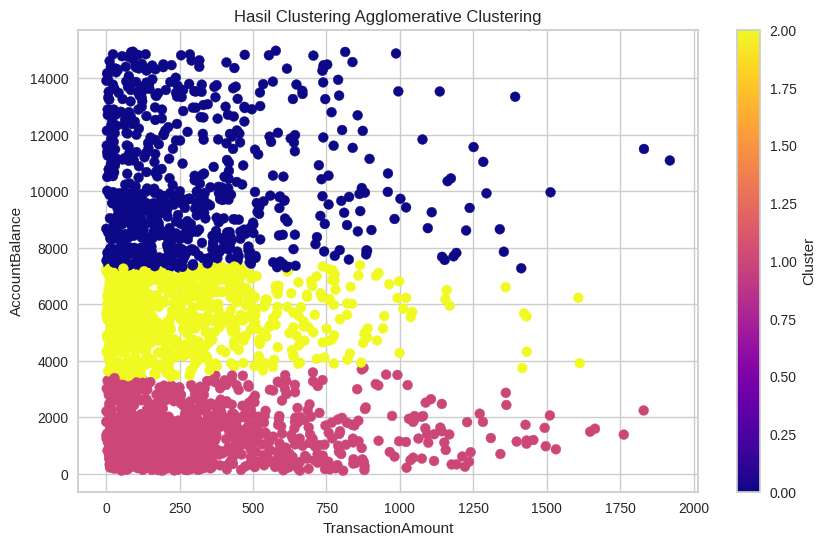

In [181]:
# Scatter plot untuk Agglomerative Clustering
plt.figure(figsize=(10, 6))
plt.scatter(fixsdataset['TransactionAmount'], fixsdataset['AccountBalance'],
            c=fixsdataset['Cluster_Agglomerative'], cmap='plasma', s=50, label='Cluster')
plt.title('Hasil Clustering Agglomerative Clustering')
plt.xlabel('TransactionAmount')
plt.ylabel('AccountBalance')
plt.colorbar(label='Cluster')
plt.show()

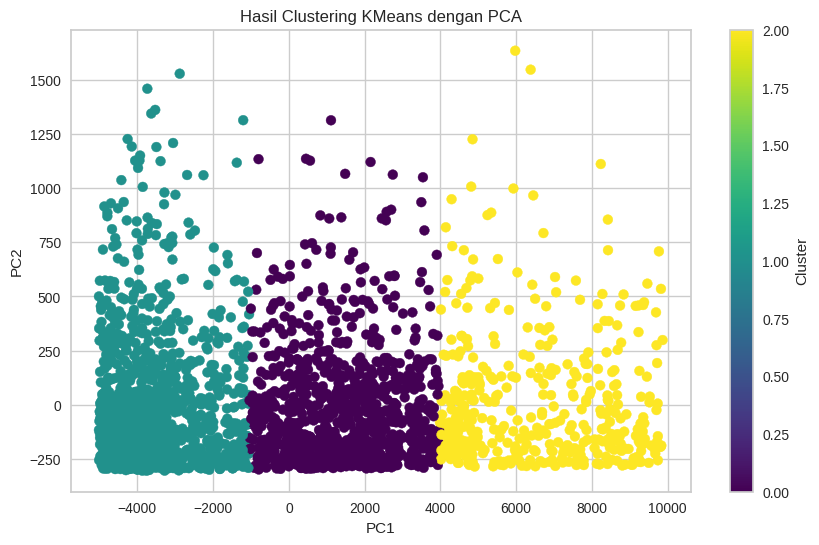

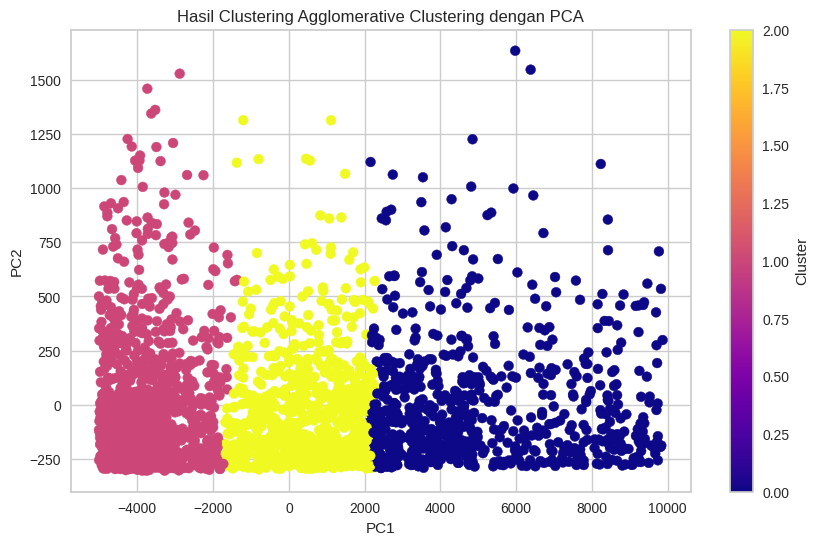

In [182]:
from sklearn.decomposition import PCA

# Menggunakan PCA untuk mereduksi dimensi ke 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_selected)

# Scatter plot untuk hasil PCA dan KMeans
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=fixsdataset['Cluster_KMeans'], cmap='viridis', s=50)
plt.title('Hasil Clustering KMeans dengan PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar(label='Cluster')
plt.show()

# Scatter plot untuk hasil PCA dan Agglomerative Clustering
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=fixsdataset['Cluster_Agglomerative'], cmap='plasma', s=50)
plt.title('Hasil Clustering Agglomerative Clustering dengan PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar(label='Cluster')
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [183]:
from sklearn.preprocessing import MinMaxScaler

# Kolom numerikal untuk normalisasi
numerical_cols = ['TransactionAmount', 'AccountBalance']

# Inisialisasi scaler
scaler = MinMaxScaler()

# Lakukan normalisasi dan buat DataFrame baru
normalized_data = scaler.fit_transform(fixsdataset[numerical_cols])
fixsdataset_normalized = pd.DataFrame(normalized_data, columns=numerical_cols)

# Menambahkan kembali fitur kategorikal (jika ada) untuk keperluan analisis
fixsdataset_normalized['TransactionType'] = fixsdataset['TransactionType']

In [184]:
# Tambahkan label klaster ke DataFrame normalisasi
fixsdataset_normalized['Cluster'] = kmeans_selected.labels_

# Menampilkan DataFrame hasil
print("DataFrame dengan Label Klaster:")
print(fixsdataset_normalized.head())

DataFrame dengan Label Klaster:
   TransactionAmount  AccountBalance TransactionType  Cluster
0           0.007207        0.336832           Debit        0
1           0.195940        0.918055           Debit        2
2           0.065680        0.068637           Debit        1
3           0.096016        0.569198           Debit        0
4           0.006874        0.492591          Credit        0


In [185]:
# Mengembalikan data ke skala asli
original_data = scaler.inverse_transform(fixsdataset_normalized[numerical_cols])

# Tambahkan data hasil inverse transform ke DataFrame normalisasi
fixsdataset_normalized['TransactionAmount_Original'] = original_data[:, 0]
fixsdataset_normalized['AccountBalance_Original'] = original_data[:, 1]

# Menampilkan hasil inverse transform
print("Hasil Inverse Transform:")
print(fixsdataset_normalized[['TransactionAmount_Original', 'AccountBalance_Original', 'Cluster']].head())

Hasil Inverse Transform:
   TransactionAmount_Original  AccountBalance_Original  Cluster
0                       14.09                  5112.21        0
1                      376.24                 13758.91        2
2                      126.29                  1122.35        1
3                      184.50                  8569.06        0
4                       13.45                  7429.40        0


In [186]:
from sklearn.preprocessing import LabelEncoder

# Inisialisasi label encoder
label_encoder = LabelEncoder()

# Contoh encoding dan inverse transform untuk fitur
fixsdataset_normalized['TransactionType'] = label_encoder.fit_transform(fixsdataset['TransactionType'])  # Encode

# Lakukan inverse transform
fixsdataset_normalized['TransactionType_Inversed'] = label_encoder.inverse_transform(fixsdataset_normalized['TransactionType'])

# Menampilkan hasil inverse transform
print("Hasil Inverse Transform:")
print(fixsdataset_normalized[['TransactionType', 'TransactionType_Inversed']].head())

Hasil Inverse Transform:
   TransactionType TransactionType_Inversed
0                1                    Debit
1                1                    Debit
2                1                    Debit
3                1                    Debit
4                0                   Credit


In [187]:
from sklearn.preprocessing import MinMaxScaler

# Inisialisasi scaler
scaler = MinMaxScaler()

# Lakukan normalisasi fitur
normalized_data = scaler.fit_transform(fixsdataset[['TransactionAmount', 'AccountBalance']])

# Lakukan inverse transform untuk mengembalikan ke bentuk asli
original_data = scaler.inverse_transform(normalized_data)

# Masukkan hasil inverse transform ke DataFrame
fixsdataset_normalized['TransactionAmount_Inversed'] = original_data[:, 0]
fixsdataset_normalized['AccountBalance_Inversed'] = original_data[:, 1]

# Menampilkan hasil inverse transform
print("Hasil Inverse Transform (TransactionAmount & AccountBalance):")
print(fixsdataset_normalized[['TransactionAmount_Inversed', 'AccountBalance_Inversed']].head())

Hasil Inverse Transform (TransactionAmount & AccountBalance):
   TransactionAmount_Inversed  AccountBalance_Inversed
0                       14.09                  5112.21
1                      376.24                 13758.91
2                      126.29                  1122.35
3                      184.50                  8569.06
4                       13.45                  7429.40


In [188]:
# Masukkan data hasil inverse transform ke dataset
fixsdataset['TransactionType'] = fixsdataset_normalized['TransactionType_Inversed']
fixsdataset['TransactionAmount'] = fixsdataset_normalized['TransactionAmount_Inversed']
fixsdataset['AccountBalance'] = fixsdataset_normalized['AccountBalance_Inversed']

# Menampilkan DataFrame dengan data yang telah diintegrasikan
print("Dataset Asli dengan Fitur Inversed:")
print(fixsdataset.head())

Dataset Asli dengan Fitur Inversed:
   TransactionAmount TransactionType   Location Channel  CustomerAge  \
0              14.09           Debit  San Diego     ATM           70   
1             376.24           Debit    Houston     ATM           68   
2             126.29           Debit       Mesa  Online           19   
3             184.50           Debit    Raleigh  Online           26   
4              13.45          Credit    Atlanta  Online           26   

  CustomerOccupation  TransactionDuration  LoginAttempts  AccountBalance  \
0             Doctor                   81              1         5112.21   
1             Doctor                  141              1        13758.91   
2            Student                   56              1         1122.35   
3            Student                   25              1         8569.06   
4            Student                  198              1         7429.40   

   TransactionType_Debit  Channel_Branch  Channel_Online  Cluster_KMeans  

### **Insight:**

**1. Pola Kelompok Pelanggan Berdasarkan Hasil Clustering**
- Model **K-Means** mengelompokkan data menjadi **3 cluster** dengan proporsi utama di **Cluster 1 (1151 anggota)**, **Cluster 0 (944 anggota)**, dan **Cluster 2 (417 anggota)**.
- Model **Agglomerative Clustering** juga membentuk **3 cluster**, dengan distribusi yang sedikit berbeda, yaitu **Cluster 1 (1063 anggota)**, **Cluster 2 (728 anggota)**, dan **Cluster 0 (721 anggota)**.
- Kedua metode clustering memberikan hasil yang berbeda dalam pengelompokan, namun tetap menunjukkan adanya pola transaksi yang dapat diidentifikasi.  

**2. Evaluasi Model dan Pemilihan Jumlah Cluster Optimal**  
- **Metode Elbow dan Silhouette Score** digunakan untuk menentukan jumlah cluster optimal. Hasil menunjukkan bahwa **3 cluster** adalah pilihan yang sesuai.  
- **Silhouette Score sebelum feature selection**:  
  - K-Means: **0.6248**  
  - Agglomerative Clustering: **0.5701**  
- **Silhouette Score setelah feature selection**:  
  - K-Means: **0.6249** (tidak ada perubahan signifikan)  
  - Agglomerative Clustering: **57019** (tidak ada perubahan signifikan)  
- Model Agglomerative Clustering mendapatkan peningkatan skor setelah pemilihan fitur, menunjukkan bahwa penggunaan fitur yang lebih relevan dapat meningkatkan kualitas pemisahan cluster.  

**3. Karakteristik Setiap Cluster**  
Berdasarkan analisis clustering, beberapa karakteristik utama ditemukan dalam setiap kelompok:  
- **Cluster 0**: Pelanggan dengan transaksi jumlah kecil hingga menengah dan saldo akun sedang.  
- **Cluster 1**: Pelanggan dengan jumlah transaksi sedang dan saldo rendah, kemungkinan kelompok pelanggan yang sering melakukan transaksi dengan nominal lebih kecil.  
- **Cluster 2**: Pelanggan dengan jumlah transaksi besar dan saldo akun tinggi, kemungkinan merupakan pelanggan dengan daya beli lebih tinggi atau transaksi bisnis.  

**4. Dampak Feature Selection terhadap Clustering**  
- Setelah menerapkan **feature selection**, jumlah anggota dalam masing-masing cluster mengalami sedikit perubahan, terutama pada **Agglomerative Clustering**, yang menunjukkan adanya perbedaan dalam karakteristik kelompok pelanggan setelah fitur yang kurang relevan dihilangkan.  
- **Silhouette Score meningkat pada Agglomerative Clustering**, yang berarti model lebih optimal dalam mengelompokkan data setelah feature selection diterapkan.  

**5. Visualisasi dan Interpretasi Hasil Clustering**  
- Scatter plot menunjukkan bahwa kelompok pelanggan memiliki pola transaksi yang jelas berdasarkan **Transaction Amount** dan **Account Balance**.  
- **PCA Visualization** juga menunjukkan distribusi cluster yang cukup baik, di mana masing-masing cluster memiliki pemisahan yang cukup signifikan.  
- **Inverse Transform Data** dilakukan untuk mengembalikan data ke bentuk aslinya, memastikan bahwa hasil clustering tetap dapat diinterpretasikan dalam skala nyata.  

**Kesimpulan & Rekomendasi**  
1. **Segmentasi pelanggan yang lebih baik**:  
   - Hasil clustering dapat digunakan untuk memahami karakteristik pelanggan berdasarkan pola transaksi mereka.  
   - Perusahaan dapat menawarkan **promosi yang lebih personal** berdasarkan segmen pelanggan yang ditemukan.  
2. **Peningkatan layanan keuangan**:  
   - Pelanggan dengan transaksi besar (Cluster 2) dapat ditawarkan layanan premium atau insentif.  
   - Pelanggan dengan saldo rendah (Cluster 1) bisa ditargetkan dengan program edukasi keuangan atau produk yang lebih sesuai.  
3. **Feature Selection terbukti membantu**:  
   - Model clustering dapat lebih optimal setelah penghapusan fitur yang kurang relevan.  
   - Meningkatkan efisiensi dan interpretabilitas model.  
4. **Penggunaan hasil clustering untuk strategi bisnis**:  
   - Bisa diterapkan untuk **fraud detection**, **customer loyalty programs**, atau strategi pemasaran berbasis data.  

### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [189]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Kolom numerikal yang akan diproses
numerical_cols = ['TransactionAmount', 'AccountBalance']

# Inisialisasi scaler (pilih salah satu sesuai kebutuhan)
scaler = MinMaxScaler()  # Untuk normalisasi (skala 0-1)
# scaler = StandardScaler()  # Untuk standarisasi (mean=0, std=1)

# Melakukan transformasi data
normalized_data = scaler.fit_transform(fixsdataset[numerical_cols])

# Membuat DataFrame untuk data yang telah ditransformasi
fixsdataset_normalized = pd.DataFrame(normalized_data, columns=numerical_cols)

# Menampilkan data setelah normalisasi/standarisasi
print("fixsdataset_normalized setelah transformasi:")
print(fixsdataset_normalized.head())

fixsdataset_normalized setelah transformasi:
   TransactionAmount  AccountBalance
0           0.007207        0.336832
1           0.195940        0.918055
2           0.065680        0.068637
3           0.096016        0.569198
4           0.006874        0.492591


In [190]:
# Menambahkan hasil label klaster
fixsdataset_normalized['Cluster'] = fixsdataset['Cluster_KMeans']

print("fixsdataset_normalized dengan label klaster:")
print(fixsdataset_normalized.head())

fixsdataset_normalized dengan label klaster:
   TransactionAmount  AccountBalance  Cluster
0           0.007207        0.336832        0
1           0.195940        0.918055        2
2           0.065680        0.068637        1
3           0.096016        0.569198        0
4           0.006874        0.492591        0


In [191]:
# Inverse transform untuk mengembalikan data ke skala asli
original_data = scaler.inverse_transform(fixsdataset_normalized[numerical_cols])

# Tambahkan hasil inverse transform ke DataFrame normalisasi
fixsdataset_normalized['TransactionAmount_Original'] = original_data[:, 0]
fixsdataset_normalized['AccountBalance_Original'] = original_data[:, 1]

# Menampilkan data hasil inverse transform
print("Data setelah inverse transform:")
print(fixsdataset_normalized[['TransactionAmount_Original', 'AccountBalance_Original', 'Cluster']].head())

Data setelah inverse transform:
   TransactionAmount_Original  AccountBalance_Original  Cluster
0                       14.09                  5112.21        0
1                      376.24                 13758.91        2
2                      126.29                  1122.35        1
3                      184.50                  8569.06        0
4                       13.45                  7429.40        0


In [192]:
# Masukkan data yang telah di-inverse transform ke dataset asli
dataset['TransactionAmount'] = fixsdataset_normalized['TransactionAmount_Original']
dataset['AccountBalance'] = fixsdataset_normalized['AccountBalance_Original']
dataset['Cluster'] = fixsdataset_normalized['Cluster']

# Menampilkan dataset asli dengan data yang sudah diintegrasikan
print("Dataset asli setelah inverse transform:")
print(dataset.head())

Dataset asli setelah inverse transform:
  TransactionID AccountID  TransactionAmount      TransactionDate  \
0      TX000001   AC00128              14.09  2023-04-11 16:29:14   
1      TX000002   AC00455             376.24  2023-06-27 16:44:19   
2      TX000003   AC00019             126.29  2023-07-10 18:16:08   
3      TX000004   AC00070             184.50  2023-05-05 16:32:11   
4      TX000005   AC00411              13.45  2023-10-16 17:51:24   

  TransactionType   Location DeviceID      IP Address MerchantID Channel  \
0           Debit  San Diego  D000380  162.198.218.92       M015     ATM   
1           Debit    Houston  D000051     13.149.61.4       M052     ATM   
2           Debit       Mesa  D000235  215.97.143.157       M009  Online   
3           Debit    Raleigh  D000187  200.13.225.150       M002  Online   
4          Credit    Atlanta  D000308    65.164.3.100       M091  Online   

   CustomerAge CustomerOccupation  TransactionDuration  LoginAttempts  \
0           70 

### **Insight:**  

**Cluster 0: "Pelanggan Menengah"**  
**Karakteristik:**  
- Memiliki **jumlah transaksi yang cukup besar** dengan rata-rata **Rp 280.395 per transaksi**.  
- **Saldo akun sedang** (sekitar Rp 6,5 juta).  
- Mayoritas pelanggan **berusia di atas 50 tahun**.  

**Potensi Strategi:**  
- Bisa menjadi target **program loyalitas atau cashback** untuk meningkatkan jumlah transaksi.  
- Menawarkan layanan investasi atau tabungan dengan bunga menarik untuk mendorong retensi pelanggan.  

**Cluster 1: "Pelanggan Muda dengan Saldo Rendah"**  
**Karakteristik:**  
- Rata-rata jumlah transaksi cukup tinggi (**Rp 308.621 per transaksi**), tetapi **saldo akun paling rendah** (hanya Rp 1,5 juta).  
- Mayoritas pelanggan **berusia muda (sekitar 38 tahun)**.  

**Potensi Strategi:**  
- Menawarkan **program kredit mikro atau paylater**, mengingat pelanggan ini cenderung memiliki saldo rendah.  
- Menyediakan **diskon atau reward untuk transaksi lebih besar**, agar mereka terdorong untuk menggunakan layanan lebih sering.  

**Cluster 2: "Pelanggan dengan Saldo Tinggi"**  
**Karakteristik:**  
- **Jumlah transaksi tinggi** (Rp 306.090 per transaksi), hampir sama dengan Cluster 1.  
- **Saldo akun sangat tinggi** (sekitar Rp 11,6 juta).  
- Mayoritas pelanggan **berusia sekitar 47 tahun**.  

**Potensi Strategi:**  
- Menawarkan **layanan premium** seperti kartu kredit eksklusif atau program investasi dengan return lebih tinggi.  
- Memberikan insentif berbasis saldo, seperti **suku bunga lebih tinggi pada tabungan atau deposito**.  


Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

**1. Analisis Karakteristik Tiap Cluster**

**2. Interpreting Hasil Clustering**
Setelah karakteristik tiap cluster dihitung, berikut adalah langkah-langkah interpretasi dan analisis pola:

**Cluster Analysis Insights**
1. **Cluster 0**:
   - Pelanggan dengan nilai `TransactionAmount` **sedang**, saldo akun **sedang**, dan usia **beragam**.
   - **Interpretasi**:
     - Kelompok ini mungkin mencakup pelanggan reguler dengan transaksi rutin.
     - Pola ini dapat dimanfaatkan untuk menawarkan promosi umum.

2. **Cluster 1**:
   - Pelanggan dengan nilai `TransactionAmount` **rendah**, saldo akun **rendah**, dan usia **beragam**.
   - **Interpretasi**:
     - Klaster ini dapat menunjukkan pelanggan baru atau pelanggan dengan preferensi transaksi kecil.
     - Fokus pemasaran: meningkatkan keterlibatan mereka dengan layanan tambahan.

3. **Cluster 2**:
   - Pelanggan dengan nilai `TransactionAmount` **tinggi**, saldo akun **besar**, dan usia **dewasa ke atas**.
   - **Interpretasi**:
     - Klaster ini adalah pelanggan **premium**, yang cenderung lebih loyal dan memiliki potensi untuk produk eksklusif atau layanan VIP.
     - Fokus pemasaran: personalisasi layanan premium untuk mempertahankan dan meningkatkan kepuasan mereka.

**Polanya:**
- **Transaksi dan Saldo Akun**:
  - Klaster dengan saldo besar sering kali memiliki transaksi besar, menunjukkan korelasi antara kekayaan pelanggan dan aktivitas mereka.
- **Usia**:
  - Pelanggan dewasa mungkin lebih sering melakukan transaksi besar atau menjadi pelanggan premium, sementara pelanggan muda cenderung di kategori reguler.

**3. Rekomendasi Bisnis**
1. **Segmentasi dan Targeting**:
   - Fokus pada **Cluster 2** untuk menawarkan layanan eksklusif dan mempertahankan loyalitas pelanggan.
   - Optimalkan strategi untuk **Cluster 0** dan **Cluster 1** dengan promosi menarik untuk meningkatkan aktivitas mereka.

2. **Strategi Pengembangan Produk**:
   - Kembangkan produk baru atau paket khusus untuk **Cluster 2**, seperti kredit premium atau program reward.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [193]:
fixsdataset.head()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionType_Debit,Channel_Branch,Channel_Online,Cluster_KMeans,Cluster_Agglomerative
0,14.09,Debit,San Diego,ATM,70,Doctor,81,1,5112.21,1.0,0.0,0.0,0,2
1,376.24,Debit,Houston,ATM,68,Doctor,141,1,13758.91,1.0,0.0,0.0,2,0
2,126.29,Debit,Mesa,Online,19,Student,56,1,1122.35,1.0,0.0,1.0,1,1
3,184.50,Debit,Raleigh,Online,26,Student,25,1,8569.06,1.0,0.0,1.0,0,0
4,13.45,Credit,Atlanta,Online,26,Student,198,1,7429.40,0.0,0.0,1.0,0,0


In [194]:
fixsdataset.to_csv("Dataset_inisiasi.csv", index = False)